# Getting data
 In this section we will get data from text file

# Using command line in notebook
One can check the operating system and run commands from within a notebook.

In [1]:
# check the files in the directory we are in
%ls 

 Volume in drive C has no label.
 Volume Serial Number is C0B9-E0BE

 Directory of C:\Users\dell

09/12/2020  10:52 PM    <DIR>          .
09/12/2020  10:52 PM    <DIR>          ..
09/30/2019  12:34 PM    <DIR>          .anaconda
09/12/2020  10:52 PM    <DIR>          .conda
09/12/2020  10:42 PM                43 .condarc
09/30/2019  12:35 PM    <DIR>          .continuum
09/21/2019  12:20 PM    <DIR>          .dotnet
04/06/2020  09:02 PM    <DIR>          .ipynb_checkpoints
10/03/2019  04:51 PM    <DIR>          .ipython
10/11/2019  01:33 PM    <DIR>          .jupyter
10/27/2019  02:18 PM    <DIR>          .matplotlib
09/09/2020  11:33 AM    <DIR>          3D Objects
11/06/2019  09:02 PM    <DIR>          Anaconda3
05/12/2020  10:04 PM            39,581 arabic Sentiment Analysis.ipynb
04/09/2020  01:25 AM             5,537 arabicNegative.txt
04/09/2020  01:31 AM             4,279 arabicPositive.txt
05/12/2020  10:03 PM             1,644 arabicSong.txt
09/09/2020  11:33 AM    <DIR>     


# Opening and Reading a Text File
Once we know where a file is we can open it. Here we will get a text online, copy it and save it as a text file for use.
* Get a song script online
* Create a text file in Jupyter, paste it in, and save it.
* Check if the file is there.
Here is some code to load text.


In [32]:
import matplotlib.pyplot as plt
import nltk
import re
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer


# make sure that graphs are embedded into our notebook output
%matplotlib inline
with open("MyTranslation.txt", "r") as file:
    script = file.read()
    
# And we can check what we got.
print(script)

You taught me to hate.
You deprived me from believing in eyes for the whole of my life
You lost me, and I wish I have never known you.
You encouraged me, so I thought I got stronger.
You made me listen to the most beautiful words and then you went away.
You left me, and I would like I have never seen you.
What have you done to me?
And you are the one, who knows that I cannot get hurt from you.
What have you done to me?
And my heart hurts in front of your eyes.
I cannot stand that anymore.
I cannot spend the evening lonely crying about myself.
I have forgotten you.
I am not able to say my love to you anymore and lie to myself.
I hated you.
I cannot spend the evening lonely crying about myself.
I have forgotten you.
I am not able to say my love to you anymore and lie to myself.
I hated you
I cannot do it anymore.
You changed me a lot
You made me used to the sorrow early.
You changed me and I could not change you.
You harden me, so I became cruel about the whole life
You made me cry and I

In [3]:
script # Read the script (without existing of new line).

'You taught me to hate.\nYou deprived me from believing in eyes for the whole of my life\nYou lost me, and I wish I have never known you.\nYou encouraged me, so I thought I got stronger.\nYou made me listen to the most beautiful words and then you went away.\nYou left me, and I would like I have never seen you.\nWhat have you done to me?\nAnd you are the one, who knows that I cannot get hurt from you.\nWhat have you done to me?\nAnd my heart hurts in front of your eyes.\nI cannot stand that anymore.\nI cannot spend the evening lonely crying about myself.\nI have forgotten you.\nI am not able to say my love to you anymore and lie to myself.\nI hated you.\nI cannot spend the evening lonely crying about myself.\nI have forgotten you.\nI am not able to say my love to you anymore and lie to myself.\nI hated you\nI cannot do it anymore.\nYou changed me a lot\nYou made me used to the sorrow early.\nYou changed me and I could not change you.\nYou harden me, so I became cruel about the whole li

# Cleaning the Script
* Lower all words.
* Splitting the script into words.
* Remove all new lines ("\n", "\r") and stop words. 

Ps. Before removing the stopwords you need to download them from nltk library.

In [4]:
nltk.download('stopwords') # Download the English stopwords like I, and, now...etc.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

script = script.lower() # Lower all words.

script=re.sub(r'\n'," ", script) # Remove all new lines

script=re.sub(r'\d'," ", script) # Remove all numbers

# now we will remove all apostrophes " ' "
script = script. replace ("â€™", "'"). replace("can't", "cannot").replace("n't", " not").\
replace("'d", " would").replace("'ve", " have")\
.replace("'ll", " will").replace("'", " ")
 
tokensLow = nltk.word_tokenize(script) # Split the script into words.

wordTokensLow = [word for word in tokensLow if word[0].isalpha()] # Check if these words are English words.

stopwords = nltk.corpus.stopwords.words("English") # Get a list of English stop words.

contentWordTokensLow = [word for word in wordTokensLow if word not in stopwords] # Check if the word is not in stop words list

contentWordTokensLow # print the result

['taught',
 'hate',
 'deprived',
 'believing',
 'eyes',
 'whole',
 'life',
 'lost',
 'wish',
 'never',
 'known',
 'encouraged',
 'thought',
 'got',
 'stronger',
 'made',
 'listen',
 'beautiful',
 'words',
 'went',
 'away',
 'left',
 'would',
 'like',
 'never',
 'seen',
 'done',
 'one',
 'knows',
 'get',
 'hurt',
 'done',
 'heart',
 'hurts',
 'front',
 'eyes',
 'stand',
 'anymore',
 'spend',
 'evening',
 'lonely',
 'crying',
 'forgotten',
 'able',
 'say',
 'love',
 'anymore',
 'lie',
 'hated',
 'spend',
 'evening',
 'lonely',
 'crying',
 'forgotten',
 'able',
 'say',
 'love',
 'anymore',
 'lie',
 'hated',
 'anymore',
 'changed',
 'lot',
 'made',
 'used',
 'sorrow',
 'early',
 'changed',
 'could',
 'change',
 'harden',
 'became',
 'cruel',
 'whole',
 'life',
 'made',
 'cry',
 'cry',
 'killed',
 'even',
 'though',
 'lived',
 'done']

# Word Frequencies
Save the results in a Python Dictionary

In [130]:
contentWordTokensLowFreq = nltk.FreqDist(contentWordTokensLow) # Frequency Distribution
contentWordTokensLowFreq # Show the words with their frequencies


FreqDist({'anymore': 4, 'made': 3, 'done': 3, 'eyes': 2, 'whole': 2, 'life': 2, 'never': 2, 'spend': 2, 'evening': 2, 'lonely': 2, ...})

In [97]:
contentWordTokensLowFreq.tabulate(10) # the top 10 high frequency words

anymore    made    done    eyes   whole    life   never   spend evening  lonely 
      4       3       3       2       2       2       2       2       2       2 


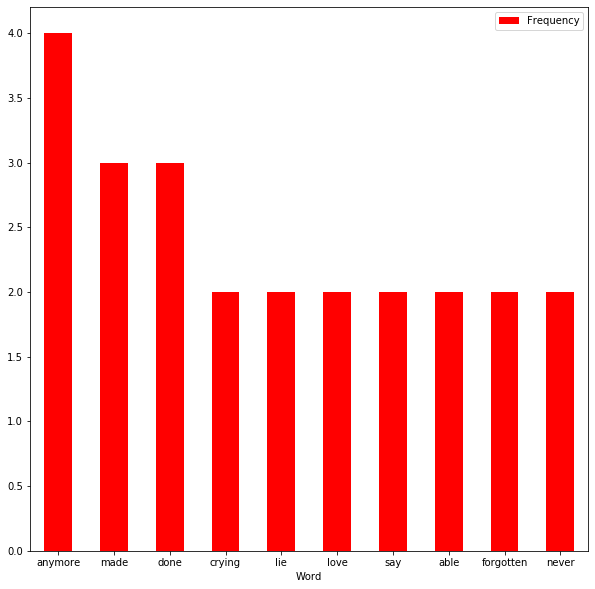

In [168]:
table = pd.DataFrame(list(contentWordTokensLowFreq.items()), columns = ["Word","Frequency"]) 
# Save the words with their frequencies as a list( array) with row title "Word", and column title "Frequency"
test = table.sort_values(['Frequency'], ascending=[False])
# Order the frequency from high value to low value
top= test.head (10) # Display the top 10 words
top.plot.bar(x="Word", y= "Frequency", rot=0, color=['r'], figsize=(10,10)) 
# plot the results in a bar char with size (10×10)

# Sentiment Analysis
* We got one text file of positive words from GitHub.
* We got one text file of negative words from GitHub.
<br> 
We will read them and use them as lists of positive and negative words.

In [9]:
with open("EnglishPositive.txt", "r") as file:
    posText = file.read()

with open("EnglishNegative.txt", "r") as file:
    negText = file.read()

posWords = nltk.word_tokenize(posText.lower())
negWords = nltk.word_tokenize(negText.lower())

print(posWords[1:5])
print(negWords[1:10])

['abound', 'abounds', 'abundance', 'abundant']
['2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


## Calculating positive and negative words

Now we will create function that counts the number of positive or negative words. The idea is that we pass the function a list of tokens (of the text) and a list of words that have emotions (positive or neagtive words). It counts how many emotion words are in the list of tokens.

In [10]:
# Function that counts how many target words are in a list of tokens
def countSentimentalTokens(listOfTokens,listOfTargetWords):
    numTargetWords = 0
    matchedWords = []
    for token in listOfTokens: # Goes through the tokens in the list
        if token in listOfTargetWords: # For each one it checks if it is in the target list
            numTargetWords += 1
            matchedWords.append(token)
    return numTargetWords, matchedWords # Note that we are returning a tuple (2 values)

thePositive = countSentimentalTokens(contentWordTokensLow,posWords)
print("The number of positive words are " + str(thePositive[0]) + " and the positive words are: \n\n " + str(thePositive[1]))

theNegative = countSentimentalTokens(contentWordTokensLow,negWords)
print("\n\n The number of negativetive words are " + str(theNegative[0]) + " and the negative words are: \n\n " + str(theNegative[1]))

The number of positive words are 10 and the positive words are: 

 ['life', 'encouraged', 'stronger', 'beautiful', 'like', 'stand', 'love', 'love', 'life', 'lived']


 The number of negativetive words are 25 and the negative words are: 

 ['hate', 'deprived', 'lost', 'never', 'away', 'left', 'never', 'hurt', 'hurts', 'lonely', 'crying', 'forgotten', 'lie', 'hated', 'lonely', 'crying', 'forgotten', 'lie', 'hated', 'sorrow', 'harden', 'cruel', 'cry', 'cry', 'killed']


## Calculating percentage of positive and negative words

Now we can calculate the percentages of postive and negative words.

In [11]:
def calculatePercent(listOfTokens,positiveList,negativeList):
    numWords = len(listOfTokens) # How many words in the English translation
    
    # We call the function to count the tokens from the positive words exist in the text
    positiveMatches = countSentimentalTokens(listOfTokens,positiveList) 
    percntPos = positiveMatches[0] / numWords # We divide by the total number of words for percentage
    
    # We call the function to count the tokens from the negative words exist in the text 
    negativeMatches = countSentimentalTokens(listOfTokens,negativeList)
    percntNeg = negativeMatches[0] / numWords # We divide by the total number of words for percentage

    return percntPos, percntNeg # We return the percentage of positive and negative words

# We test the function on the first sentence
results = calculatePercent(tokensLow,posWords,negWords)
print("Positive: " + "{:.0%}".format(results[0]) + "  Negative: " + "{:.0%}".format(results[1]))

Positive: 4%  Negative: 10%


## Calculate sentiment

Here we calculate whether a sentence is positive or negative.

In [12]:
def calculateSentiment(percntPos,percntNeg):
    sentiment = percntPos - percntNeg # Subtract the percentage of negative words from positive words
    return sentiment

# Test what we get
calculateSentiment(results[0],results[1])
# If the result is 0, then the text is neutral
# If the result is more than 0, then the text is positive
# If the result is less than 0, then the text is negative

-0.05703422053231939